# Data visualization : Dainiak. 3d plots, animation

**Список литературы**:

1)    Milovanovic, Foures, Vettigli — Python Data Visualization Cookbook, 2nd Edition

Этот ноутбук посвящен визуализации данных, в основном речь пойдет о двух важных темах: визуализации в 3d и об анимации. На мой взгляд, лучше всего учиться этому на примерах и разбираться в неинтуитивных строках кода, которые мы обычно просто копируем и забываем, когда сталкивается с этим на практике, поэтому я решил устроить повествование следующим образом: каждый раз мы будем начинать с примера, и каждый раз будем пытаться разобраться в непростых его местах. 

## 3d plots

### Simple ones

<IPython.core.display.Javascript object>


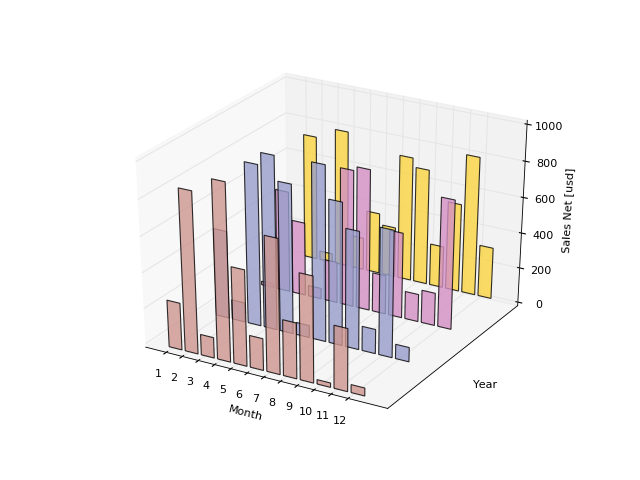

In [1]:
import random
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib nbagg
import matplotlib.dates as mdates
from mpl_toolkits.mplot3d import Axes3D

mpl.rcParams['font.size'] = 10
fig = plt.figure()

# see note 1.1
ax = fig.add_subplot(111, projection='3d')

# see note 1.2
for z in [2011, 2012, 2013, 2014]:
    xs = xrange(1,13)
    ys = 1000 * np.random.rand(12)
    color = plt.cm.Set2(random.choice(xrange(plt.cm.Set2.N)))
    ax.bar(xs, ys, zs=z, zdir='y', color=color, alpha=0.8)
    
# see note 1.3
ax.xaxis.set_major_locator(mpl.ticker.FixedLocator(xs))
ax.yaxis.set_major_locator(mpl.ticker.FixedLocator(ys))
ax.set_xlabel('Month')
ax.set_ylabel('Year')
ax.set_zlabel('Sales Net [usd]')
plt.show()

*На графике изображены данные по продажам во времени (год vs месяц)*

**Note 1.1**

В matplotlib, figure() создает окно пользовательского интерфейса, непосредственно графики неявно создаются только путем вызова plot(). Это хорошо для простых графиков, но для создания сложных графиков полезно иметь возможность явным образом создать figure() и получить ссылку на ее экземпляр. figure() может содержать один или несколько  подграфиков (subplots). Функции add_subplot и subplots позволяют расставить в пользовательском интерфейсе графики, как нам угодно. Обычно через эти функции используют, чтобы [графики были один под другим или в строчку](https://github.com/matplotlib/matplotlib/issues/1381/) - аргумент 111 значит следующее: first in rows, first in column, first (upper) plot. [Здесь](http://matplotlib.org/examples/pylab_examples/subplots_demo.html) можно найти кучу простых примеров, как расположить графики по столбцам и строчкам.

В этой же заметке думаю, остается написать, что можно получить еще больший контроль над позиционированием графиков за счет использования matplotlib.axes.Axes , который позволит вам при желании расположить какой-нибудь маленький график внутри большого.

**Note 1.2**

Мы использовали mpl_toolkits.mplot3d.Axes3D. При работе с Axes3D нужно прописать 3 вещи:
1. xs, ys - координаты по X,Y осям
2. zs - координаты по Z. Может одно значение на все точки (как в этом примере) или одно для каждой
3. zdir - какая из осей будет по Z 

Как видим, в нашем примере мы строили не поверхность а гистографмы для каждого z по X, Y. Этого мы достигли с помощью функции ax.bars, никто не мешал сделать то же самое точками (ax.scatter) или линией (ax.plot). Два классических примера можно найти [тут](http://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html): первый про ax.plot, второй - про ax.scatter.
Здесь же остается поясннить, что сolor = plt.cm.Set2(random.choice(xrange(plt.cm.Set2.N))) - выбирает случайный цвет.  Параметр alpha в ax.bars контролирует прозрачность баров.

**Note 1.3**

Зачастую приходится управлять разибением осей, т.е. прописывать, где на каждой из осейчас должны стоять засечки с подписанными аргументами. Разные стратегии подобного рода разбиений реализованы в matplotlib через функцию [set_major_locator](http://matplotlib.org/api/ticker_api.html). Стратегии там, есть разные, лучше посмотрите какие они бывают в документации. Хороший пример, когда это может вам пригодиться - это логарифмическая шкала (LogLocator)

### Surfaces

В текущее время matplotlib предоставляет 3 инструмента для отрисовки поверхностей - tri_surface, surface, wireframe. Начнем мы с tri_surface. 

##### tri_surface

<IPython.core.display.Javascript object>


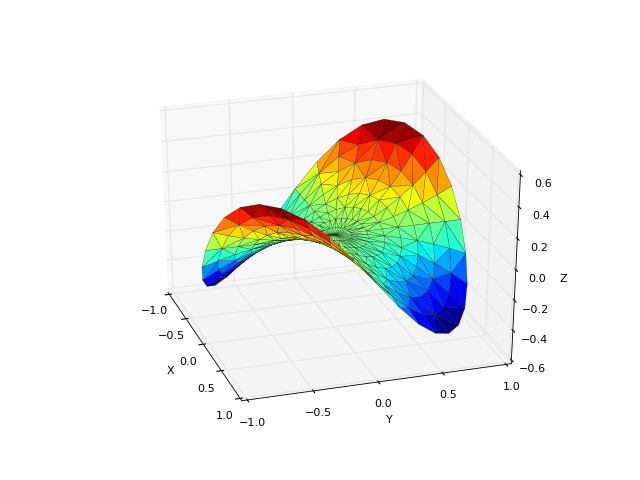

In [34]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np
n_angles = 36
n_radii = 8
# An array of radii
# Does not include radius r=0, this is to eliminate duplicate points
radii = np.linspace(0.125, 1.0, n_radii)
# An array of angles
angles = np.linspace(0, 2*np.pi, n_angles, endpoint=False)
# Repeat all angles for each radius
angles = np.repeat(angles[...,np.newaxis], n_radii, axis=1)
# Convert polar (radii, angles) coords to cartesian (x, y) coords
# (0, 0) is added here. There are no duplicate points in the (x, y)
# plane
x = np.append(0, (radii*np.cos(angles)).flatten())
y = np.append(0, (radii*np.sin(angles)).flatten())
# Pringle surface
z = np.sin(-x*y)
fig = plt.figure()
ax = fig.gca(projection='3d')

# see note 2.1
ax.plot_trisurf(x, y, z, cmap=cm.jet, linewidth=0.2)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

*На графике изображен гиперболический параболоид*

**Note 2.1**

tri_surface является совершенно логичным шагом следующим за отрисовкой данных в 3d с помощью баров, линий и точек. Как и прежде, нам нужно прописать x,y и z размерности один, точнее shape = (n, ). Весь вопрос состоит в том, как объединить точки в поверхность. Как вы можете себе предствить, сделать это можно очень по-разному. tri_surface представляет поверхность треуголниками. По умолчанию tri_surface разбивает точки на треуголники с помощью [триангуляции Делоне](https://en.wikipedia.org/wiki/Delaunay_triangulation), что отнюдь не всегда приводит к красивым результатам. Поэтому, иногда для того, чтобы получить хороший результат приходится прописывать триангуляцию самому, о том в каком виде триангуляцию нужно подать на вход написано [здесь](http://matplotlib.org/api/tri_api.html#matplotlib.tri.Triangulation).

##### surface & wireframe plot

<IPython.core.display.Javascript object>


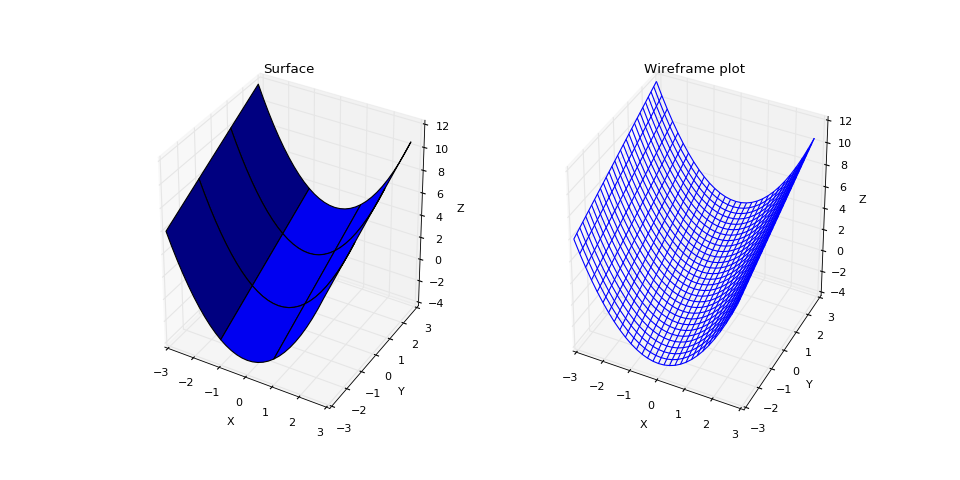

In [35]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import random

def fun(x, y):
    return x**2 + y

# see note 3.1
fig = plt.figure(figsize=plt.figaspect(0.5))
ax1 = fig.add_subplot(121, projection='3d')
x = y = np.arange(-3.0, 3.0, 0.2)

# grid may be not uniform, try
#x = y = np.append(np.arange(-3.0, 3.0, 0.2), 5)

X, Y = np.meshgrid(x, y)
zs = np.array([fun(x,y) for x,y in zip(np.ravel(X), np.ravel(Y))])
Z = zs.reshape(X.shape)

# see note 3.2
ax1.plot_surface(X, Y, Z)
ax1.set_title('Surface')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')


ax2 = fig.add_subplot(122, projection='3d')
# see note 3.3
ax2.plot_wireframe(X, Y, Z)
ax2.set_title('Wireframe plot')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('Z')

plt.show()

*Графики поверхности z = x**2 + y с использованием surface и wireframe plot*

**Note 3.1**

figsize=plt.figaspect(0.5) позволяет зафиксировать соотношение между высотой и широной графика (figure).

**Note 3.2**

Использование tri_surface далеко не всегда является удобным. В случаях, когда не хочется думать о триангуляции или, тем более, когда у вас есть функция поверхности z = f(x, y), более простым может оказаться использование функции surface. Идея, состоит в том, чтобы от треугольников в пространстве перейти к четырехугольной сетке на плоскости  XoY, для каждого узла сетки подсчитать Z, и соединить плоскости над каждой ячейкой в XoY естественным образом. При этом, следует отметить, что сетка не обязана быть равномерной, чтобы в этом убедиться, вы можете изменить код из примера, заменив x = y = np.arange(-3.0, 3.0, 0.05) на x = y = np.append(np.arange(-3.0, 3.0, 0.05), 5).

При построение поверхностей с помощью surface очень удобно пользоваться функцией из numpy np.meshgrid, подробно на ней я останавливаться не буду, на мой взгляд, лучше всего прочитать про нее [тут](http://stackoverflow.com/questions/36013063/what-is-purpose-of-meshgrid-in-python).

**Note 3.3**

Справа от surface графика я нарисовал тот же самый график типа wireframe. Концептуальной разницы между ними нет, все отличие состоит в том, что wireframe plot не раскрашивает плоскости над элементарными ячейками в XoY, отрисовывая лишь их границы.

In [ ]:
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
from plotly.graph_objs import *
# see note 4.1 
init_notebook_mode()
import numpy as np

# see note 4.2
x, y, z = np.random.multivariate_normal(np.array([0,0,0]), np.eye(3), 200).transpose()
trace1 = go.Scatter3d(
    x=x,
    y=y,
    z=z,
    mode='markers',
    marker=dict(
        size=10,
        line=dict(
            color='rgba(5, 5, 5, 0.14)',
            width=0.5
        ),
        opacity=0.8
    )
)

# see note 4.3
data = [trace1]
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    )
)
fig = Figure(data=data, layout=layout)
iplot(fig, filename='simple-3d-scatter')

*На графике изображены нормальные случайные величины в 3d пространстве*

In [ ]:
Говоря
**Note 4.1**
